<a href="https://colab.research.google.com/github/mrinalsarkar1999/Simple-web-pages-for-practice/blob/master/HandGestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello there")

Hello there


In [ ]:
print("Welcome students!")

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
# Step 2: Load and explore the MNIST dataset
print("Step 2: Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")


Step 2: Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10



Step 3: Visualizing sample images...


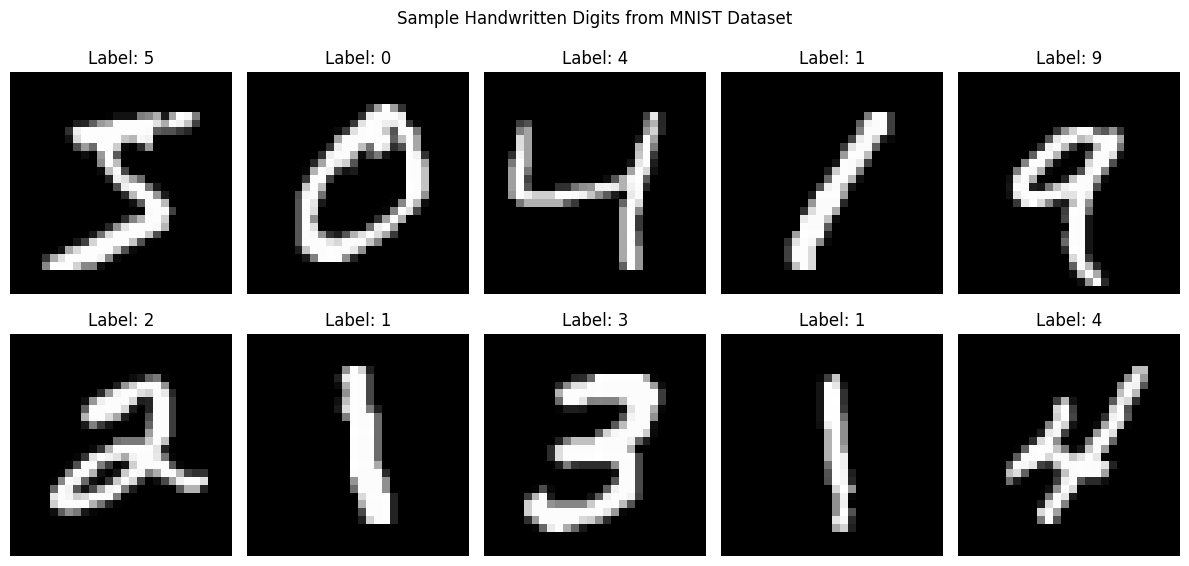

In [4]:
print("\nStep 3: Visualizing sample images...")
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample Handwritten Digits from MNIST Dataset')
plt.tight_layout()
plt.show()

In [5]:
print("\nStep 4: Preprocessing the data...")

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for neural network (flatten 28x28 images to 784 features)
x_train_flattened = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flattened = x_test.reshape(x_test.shape[0], 28 * 28)

# Convert labels to categorical (one-hot encoding)
y_train_categorical = keras.utils.to_categorical(y_train, 10)
y_test_categorical = keras.utils.to_categorical(y_test, 10)

print(f"Reshaped training data: {x_train_flattened.shape}")
print(f"Categorical labels shape: {y_train_categorical.shape}")


Step 4: Preprocessing the data...
Reshaped training data: (60000, 784)
Categorical labels shape: (60000, 10)


In [6]:
# Step 5: Build the neural network model
print("\nStep 5: Building the model...")

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden_layer_1'),
    layers.Dropout(0.2, name='dropout_layer'),  # Prevents overfitting
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    layers.Dense(10, activation='softmax', name='output_layer')  # 10 classes (0-9)
])

# Display model architecture
model.summary()


Step 5: Building the model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
print("\nStep 6: Compiling the model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



Step 6: Compiling the model...


In [8]:
# Step 7: Train the model
print("\nStep 7: Training the model...")
history = model.fit(
    x_train_flattened,
    y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_split=0.1,  # Use 10% of training data for validation
    verbose=1
)


Step 7: Training the model...
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7857 - loss: 0.7296 - val_accuracy: 0.9610 - val_loss: 0.1421
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9435 - loss: 0.1892 - val_accuracy: 0.9698 - val_loss: 0.1027
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9608 - loss: 0.1317 - val_accuracy: 0.9742 - val_loss: 0.0879
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9671 - loss: 0.1075 - val_accuracy: 0.9755 - val_loss: 0.0801
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9720 - loss: 0.0924 - val_accuracy: 0.9777 - val_loss: 0.0732
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9755 - loss: 0.0788 - val_accuracy: 0.9797 - val_loss: 0.0690
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9782 - loss: 0.0710 - val_accuracy: 0.9778 - val_loss: 0.0711
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9815 - 

In [9]:
print("\nStep 8: Visualizing training history...")
plt.figure(figsize=(12, 4))


Step 8: Visualizing training history...


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

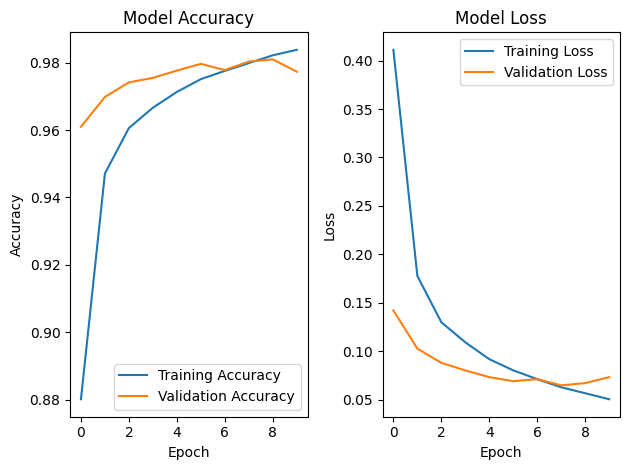

In [10]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Step 9: Evaluate the model
print("\nStep 9: Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test_categorical, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Step 9: Evaluating the model...
Test Accuracy: 0.9757
Test Loss: 0.0782


In [12]:
print("\nStep 10: Making predictions...")
predictions = model.predict(x_test_flattened)
predicted_classes = np.argmax(predictions, axis=1)


Step 10: Making predictions...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step



Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



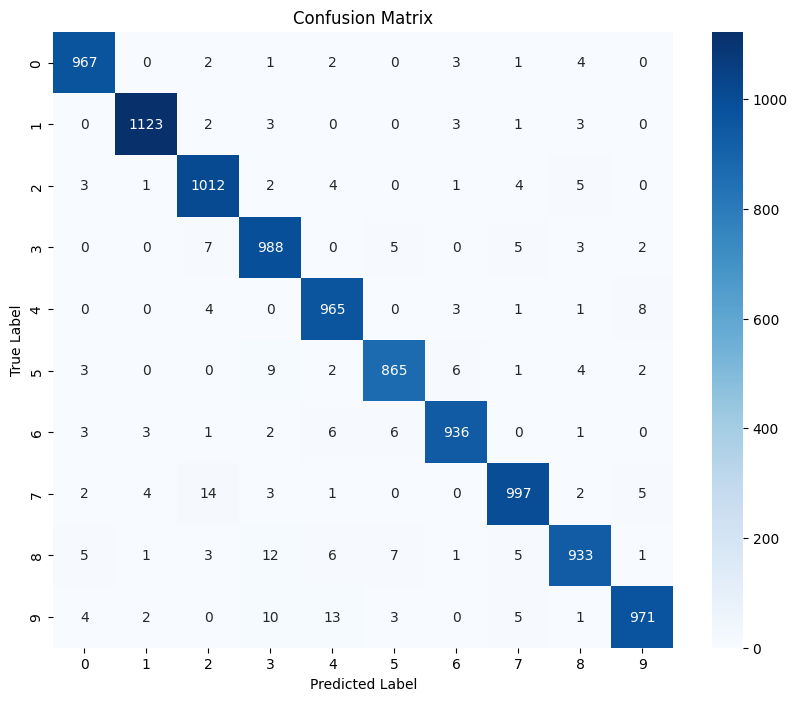

In [13]:
# Classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, predicted_classes))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Step 11: Sample predictions...


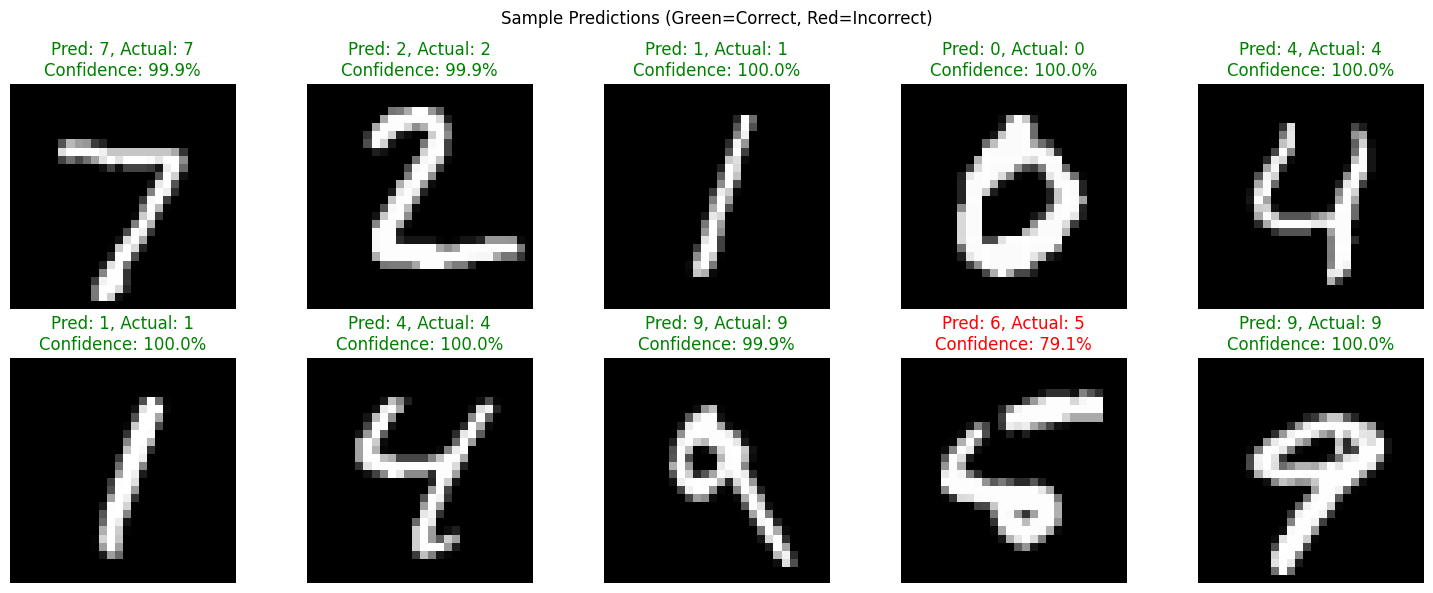

In [14]:
print("\nStep 11: Sample predictions...")
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_digit = predicted_classes[i]
    actual_digit = y_test[i]
    confidence = np.max(predictions[i]) * 100

    color = 'green' if predicted_digit == actual_digit else 'red'
    plt.title(f'Pred: {predicted_digit}, Actual: {actual_digit}\nConfidence: {confidence:.1f}%',
              color=color)
    plt.axis('off')
plt.suptitle('Sample Predictions (Green=Correct, Red=Incorrect)')
plt.tight_layout()
plt.show()

# Step 12: Function to predict on new images
def predict_digit(image_array):
    """
    Predict digit for a single 28x28 image
    """
    # Ensure image is the right shape and normalized
    if image_array.shape != (28, 28):
        raise ValueError("Image must be 28x28 pixels")

    # Normalize and reshape
    image_normalized = image_array.astype('float32') / 255.0
    image_flattened = image_normalized.reshape(1, 784)

    # Make prediction
    prediction = model.predict(image_flattened, verbose=0)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    return predicted_digit, confidence

In [15]:
print("\nStep 12: Testing prediction function...")
test_image = x_test[0] * 255  # Convert back to original scale for demonstration
predicted_digit, confidence = predict_digit(test_image)
print(f"Predicted digit: {predicted_digit}")
print(f"Confidence: {confidence:.2f}%")
print(f"Actual digit: {y_test[0]}")


Step 12: Testing prediction function...
Predicted digit: 7
Confidence: 99.93%
Actual digit: 7


In [17]:
# Step 13: Save the model (optional)
print("\nStep 13: Saving the model...")
model.save('digit_classifier_model.h5')
print("Model saved as 'digit_classifier_model.h5'")

print("\n" + "="*50)
print("CONGRATULATIONS! You've successfully built a handwritten digit classifier!")
print("="*50)
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")


Step 13: Saving the model...
Model saved as 'digit_classifier_model.h5'

CONGRATULATIONS! You've successfully built a handwritten digit classifier!
Final Test Accuracy: 0.9757 (97.57%)


In [18]:
import os
print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir())

Current directory: /content
Files in current directory: ['.config', 'digit_classifier_model.h5', 'sample_data']
